In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

In [469]:
def transMatrix(p, tpf, as_df = True, **bag):
    arr = np.zeros((p,p))
    bag["size"] = p
    for i in range(p):
        for j in range(p):
            arr[i,j] = tpf(i,j, **bag) 
    arr = arr / arr.sum(1).reshape(-1,1)
    if as_df:
        arr = pd.DataFrame(arr)
    return arr 


In [582]:
def limiting(n, Pf, mu = None, **bag):
    p = bag["p"]#P.shape[0]
    if not mu:
        mu = np.ones((1,p)) / p
    P_ = P; states = mu 
    while n > 0:
        mu = np.dot(mu, Pf(**bag))
        states = np.append(states, mu, axis=0) 
        n -= 1
    return pd.DataFrame(states), mu

In [583]:
def chaining(n, P, mu = None):
    p = bag["p"]; i = 0
    chain = [np.random.randint(0,p),]
    if not mu:
        mu = np.ones((1,p)) / p # np.zeros((1,p))
        #mu[0,chain[-1]] = 1 
    while i < n - 1:
        mu = np.dot(mu, P)
        #n_state = np.argmax(np.random.multinomial(1, P[chain[i]])) 
        n_state = np.argmax(np.random.multinomial(1, mu.squeeze())) 
        chain.append(n_state) 
        i += 1
    return chain
    
def unchain(chain, as_df = True):
    p = np.max(chain)
    arr = np.array(chain).reshape(-1, 1) == np.arange(p + 1)
    if as_df:
        arr = pd.DataFrame(arr)
    return arr

def multichain(m, n, Pf, mu = None, **bag):
    frame = pd.DataFrame()
    for _ in range(m):
        uchain = unchain(chaining(n, Pf(**bag), mu))
        sfr = uchain.cumsum() / np.arange(1, n + 1).reshape(-1,1)
        frame = pd.concat([frame, sfr]) 
    return frame 
    

In [568]:
def transProbs(i, j, sp = 0, size = None):
    mp = 1 - sp
    last = size - 1
    if i == 0 and j == 0:
        x = sp + mp / 3 * 2
    elif i == last and j == last:
        x = sp + mp / 3
    elif i == j:
        x = sp
    elif j == i + 1:
        x = mp / 3
    elif j == i - 1:
        x = mp / 3 * 2
    else:
        x = 0
    return x

def tranzProbs(i, j, size = None):
    if j == 0:
        x = np.random.gamma(2.70,1/2)
    else:
        x = 1 / (abs(i * j)**2 + 1)
    return x

In [578]:
#P = transMatrix(4, transProbs, **{"sp":0.1})
#P = transMatrix(4, tranzProbs, as_df=True)
bag = {"p":10, "tpf": tranzProbs}

In [584]:
fr, mu = limiting(3000, transMatrix, **bag)

In [571]:
afr = fr.cumsum() / np.arange(1, 3001 + 1).reshape(-1,1)

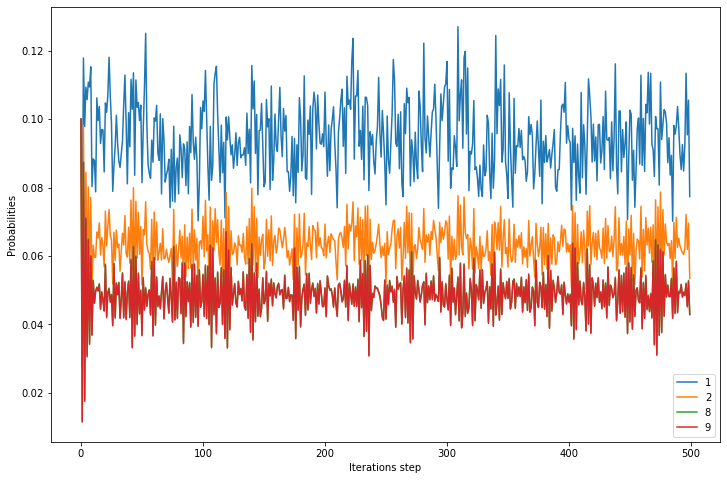

In [595]:
plt.figure(figsize=(12, 8))
ax = plt.gca() 
fr[fr.index < 500][[1,2,8,9]].plot(ax = ax)
#ax.axhline(y= 0.5, color='grey', linewidth=0.8)
ax.set_ylabel('Probabilities')
ax.set_xlabel('Iterations step')
plt.show() 

In [597]:
dff = multichain(20, 25000, transMatrix, **bag)

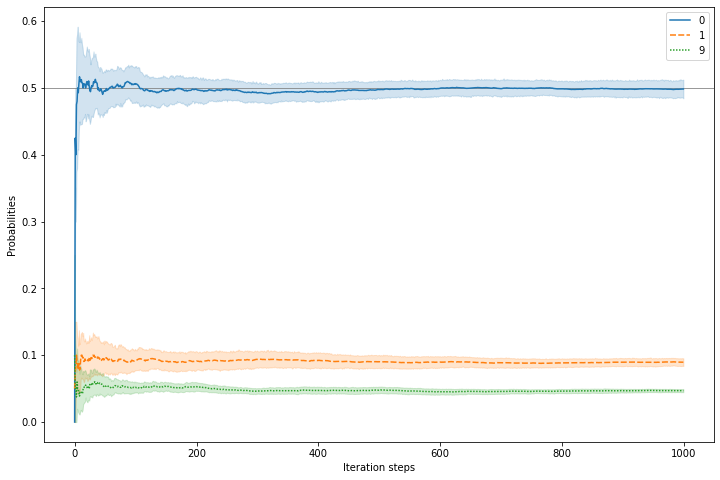

In [599]:
plt.figure(figsize=(12, 8))
ax = plt.gca() 
ax.axhline(y= 0.5, color='grey', linewidth=0.8)
sns.lineplot(data=dff[dff.index < 1000][[0,1,9]],  ax=ax)
ax.set_ylabel('Probabilities')
ax.set_xlabel('Iteration steps')
plt.show() 

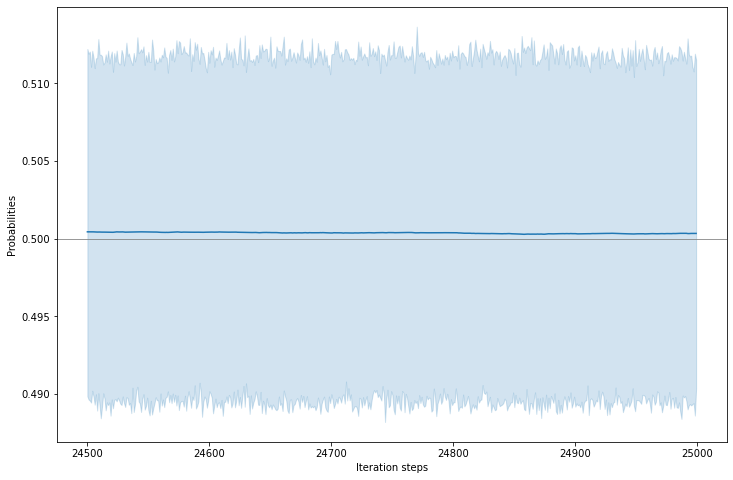

In [598]:
plt.figure(figsize=(12, 8))
ax = plt.gca() 
ax.axhline(y= 0.5, color='grey', linewidth=0.8)
sns.lineplot(data=dff[dff.index > 24499][0],  ax=ax)
ax.set_ylabel('Probabilities')
ax.set_xlabel('Iteration steps')
plt.show() 

In [493]:
np.random.gamma(2,1, 20).mean()

2.206588694599215